In [ ]:
# prompt: read T124OPPE2_Preprocessing_V1.csv

import pandas as pd
df = pd.read_csv('T124OPPE2_Preprocessing_V1.csv')


In [ ]:
df.head()

,Gender,Age,HasTension,AnyHeartDisease,NeverMarried,Occupation,LivesIn,GlucoseLevel,BMI,SmokingStatus,HeartAttack
0,Female,75.0,Yes,No,Yes,Self-employed,City,54.6,35.1,never smoked,No
1,Female,49.0,No,No,Yes,Private,Village,108.8,26.7,smokes,No
2,Male,32.0,No,No,Yes,Private,City,64.1,23.4,smokes,No
3,Male,78.0,No,No,Yes,Self-employed,City,219.2,27.4,Unknown,Yes
4,Male,39.0,No,No,Yes,Private,City,55.4,41.6,formerly smoked,No


In [ ]:
df['Gender'].unique()

array(['Female', 'Male', 'Unknown'], dtype=object)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,2366
Male,1627
Unknown,7


In [ ]:
df[df['Gender'] == 'Unknown']['Gender'].size

7

In [ ]:
df['Age'].value_counts()

,count
Age,
78.00,79
45.00,71
57.00,71
54.00,69
53.00,69
...,...
0.24,3
0.40,2
1.16,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4000 non-null   object 
 1   Age              4000 non-null   float64
 2   HasTension       4000 non-null   object 
 3   AnyHeartDisease  4000 non-null   object 
 4   NeverMarried     4000 non-null   object 
 5   Occupation       4000 non-null   object 
 6   LivesIn          4000 non-null   object 
 7   GlucoseLevel     4000 non-null   float64
 8   BMI              3851 non-null   float64
 9   SmokingStatus    4000 non-null   object 
 10  HeartAttack      4000 non-null   object 
dtypes: float64(3), object(8)
memory usage: 343.9+ KB


In [ ]:
# prompt: find missing values in Age column

df['Age'].isnull().sum()


0

In [ ]:
df['GlucoseLevel'].value_counts()

,count
GlucoseLevel,
79.0,14
82.8,13
109.2,13
76.5,12
79.1,12
...,...
159.0,1
172.3,1
165.4,1


In [ ]:
df['LivesIn'].value_counts()

,count
LivesIn,
City,2030
Village,1965
Unknown,5


In [ ]:
df['BMI'].value_counts()

,count
BMI,
24.7,34
26.4,30
28.8,29
25.5,29
27.0,29
...,...
40.6,1
54.2,1
55.1,1


In [ ]:
df['HeartAttack'].value_counts()

,count
HeartAttack,
No,3806
Yes,194


In [ ]:
df['BMI'].isnull().sum()

149

In [ ]:
df['SmokingStatus'].value_counts()

,count
SmokingStatus,
never smoked,1502
Unknown,1204
formerly smoked,697
smokes,597


In [ ]:
# prompt: What is the mean value of the BMI in the dataset? Ignore the missing values if any

df['BMI'].mean()


28.857958971695663

In [ ]:
# prompt: get non-null BMI values list in the dataset

non_null_bmi_values = df['BMI'].dropna()
non_null_bmi_values.mean()


28.857958971695663

In [ ]:
# prompt: How many people live in city, smoked at least once in life and had a heartattack?

count = df[(df['LivesIn'] == 'City') & (df['SmokingStatus'] != 'never smoked') & (df['SmokingStatus'] != 'Unknown') & (df['HeartAttack'] == 'Yes')].shape[0]
print(count)


52


In [ ]:
# prompt: female patients without tension, without any heart disease and never married

count = df[(df['Gender'] == 'Female') & (df['HasTension'] == 'No') & (df['AnyHeartDisease'] == 'No') & (df['NeverMarried'] == 'Yes')].shape[0]
print(count)


1335


In [ ]:
# prompt: female patients without tension, without any heart disease and either currently married or married before

count = df[(df['Gender'] == 'Female') & (df['HasTension'] == 'No') & (df['AnyHeartDisease'] == 'No') & (df['NeverMarried'] == 'No')].shape[0]
print(count)


754


In [ ]:
# prompt: male patients without tension, without any heart disease and never married

count = df[(df['Gender'] == 'Male') & (df['HasTension'] == 'No') & (df['AnyHeartDisease'] == 'No') & (df['NeverMarried'] == 'Yes')].shape[0]
print(count)


795


In [ ]:
# prompt: male patients with tension, with a heart disease and never married

count = df[(df['Gender'] == 'Male') & (df['HasTension'] == 'Yes') & (df['AnyHeartDisease'] == 'Yes') & (df['NeverMarried'] == 'Yes')].shape[0]
print(count)


24


In [ ]:
df1['Gender'].value_counts()

,count
Gender,
0.0,2373
1.0,1627


In [ ]:
df1 = df.copy()

In [ ]:
# prompt: replace Gender with value 'Unknown' to null
import numpy as np
df1['Gender'].replace('Unknown', np.nan, inplace=True)


In [ ]:
df1['Gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: Gender
Non-Null Count  Dtype 
--------------  ----- 
4000 non-null   object
dtypes: object(1)
memory usage: 31.4+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
impute_frequent = SimpleImputer(strategy='most_frequent')
impute_frequent.fit(df1[['Gender']])

SimpleImputer(strategy='most_frequent')

In [ ]:
df1[['Gender']]=impute_frequent.transform(df1[['Gender']])

In [ ]:
encoder_gender = OrdinalEncoder()
df1['Gender'] = encoder_gender.fit_transform(df1[['Gender']])

In [ ]:
impute_mean = SimpleImputer(strategy='mean')
df1['Age'] = impute_mean.fit_transform(df1[['Age']])
scaler_age = StandardScaler()
df1['Age'] = scaler_age.fit_transform(df1[['Age']])

In [ ]:
df1['Age'].mean()

3.7836400679225334e-16

In [ ]:
df1['Age'].std()

1.0001250234423837

In [ ]:
encoder_tension = OrdinalEncoder()
df1['HasTension'] = encoder_tension.fit_transform(df1[['HasTension']])

In [ ]:
df1['HasTension'].value_counts()

,count
HasTension,
0.0,3610
1.0,390


In [ ]:
# AnyHeartDisease: Ordinally encode.
encoder_heartdisease = OrdinalEncoder()
df1['AnyHeartDisease'] = encoder_heartdisease.fit_transform(df1[['AnyHeartDisease']])

In [ ]:
# NeverMarried: Ordinally encode.
encoder_nevermarried = OrdinalEncoder()
df1['NeverMarried'] = encoder_nevermarried.fit_transform(df[['NeverMarried']])

In [ ]:
df1['Occupation'].value_counts()

,count
Occupation,
Private,2308
Self-employed,649
children,531
Govt_job,495
Never_worked,17


In [ ]:
# Occupation: One hot encode.
encoder_occupation = OneHotEncoder(handle_unknown='ignore')
occupation_encoded = encoder_occupation.fit_transform(df1[['Occupation']]).toarray()
occupation_df = pd.DataFrame(occupation_encoded, columns=encoder_occupation.get_feature_names_out(['Occupation']))
df1 = pd.concat([df, occupation_df], axis=1)
df1.drop('Occupation', axis=1, inplace=True)

In [ ]:
df1['LivesIn'].replace('Unknown', np.nan, inplace=True)

In [ ]:
# LivesIn: Impute with most frequent then ordinally encode.
impute_frequent.fit(df1[['LivesIn']])
df1[['LivesIn']] = impute_frequent.transform(df1[['LivesIn']])
encoder_livesin = OrdinalEncoder()
df1['LivesIn'] = encoder_livesin.fit_transform(df1[['LivesIn']])

In [ ]:
df1['LivesIn'].value_counts()

,count
LivesIn,
0.0,2035
1.0,1965


In [ ]:
# GlucoseLevel: Impute with mean, then min-max scaling.
df1['GlucoseLevel'] = impute_mean.fit_transform(df1[['GlucoseLevel']])
scaler_glucose = MinMaxScaler()
df1['GlucoseLevel'] = scaler_glucose.fit_transform(df1[['GlucoseLevel']])

In [ ]:
df1['GlucoseLevel'].min()

0.0

In [ ]:
# BMI: Impute with mean, then standard scale.
df1['BMI'] = impute_mean.fit_transform(df1[['BMI']])
scaler_bmi = StandardScaler()
df1['BMI'] = scaler_bmi.fit_transform(df1[['BMI']])

In [ ]:
# prompt: SmokingStatus: Impute with most frequent, then one hot encode

# SmokingStatus: Impute with most frequent, then one hot encode.
impute_frequent.fit(df1[['SmokingStatus']])
df1[['SmokingStatus']] = impute_frequent.transform(df1[['SmokingStatus']])
encoder_smoking = OneHotEncoder(handle_unknown='ignore')
smoking_encoded = encoder_smoking.fit_transform(df1[['SmokingStatus']]).toarray()
smoking_df = pd.DataFrame(smoking_encoded, columns=encoder_smoking.get_feature_names_out(['SmokingStatus']))
df1 = pd.concat([df1, smoking_df], axis=1)
df1.drop('SmokingStatus', axis=1, inplace=True)


In [ ]:
df1.head()

,Gender,Age,HasTension,AnyHeartDisease,NeverMarried,LivesIn,GlucoseLevel,BMI,HeartAttack,Occupation_Govt_job,Occupation_Never_worked,Occupation_Private,Occupation_Self-employed,Occupation_children,SmokingStatus_Unknown,SmokingStatus_formerly smoked,SmokingStatus_never smoked,SmokingStatus_smokes
0,0.0,75.0,1.0,0.0,1.0,0.0,0.206419,0.804933,No,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,49.0,0.0,0.0,1.0,1.0,0.404085,-0.278276,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,32.0,0.0,0.0,1.0,0.0,0.241065,-0.703823,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,78.0,0.0,0.0,1.0,0.0,0.806710,-0.188009,Yes,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,39.0,0.0,0.0,1.0,0.0,0.209336,1.643130,No,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# prompt: Hint: After transformation, your feature matrix must have columns in following order:
# 	0. Gender
# 	1. Age
# 	2. HasTension
# 	3. AnyHeartDisease
# 	4. NeverMarried
# 	5. Occupation_Govt_job
# 	6. Occupation_Never_worked
# 	7. Occupation_Private
# 	8. Occupation_Self-employed
# 	9. Occupation_children
# 	10. LivesIn
# 	11. GlucoseLevel
# 	12. BMI
# 	13. SmokingStatus_formerly smoked
# 	14. SmokingStatus_never smoked
# 	15. Sm

df1 = df1[['Gender', 'Age', 'HasTension', 'AnyHeartDisease',
           'NeverMarried', 'Occupation_Govt_job', 'Occupation_Never_worked',
           'Occupation_Private', 'Occupation_Self-employed', 'Occupation_children',
           'LivesIn', 'GlucoseLevel', 'BMI', 'SmokingStatus_formerly smoked',
           'SmokingStatus_never smoked', 'SmokingStatus_smokes']]
df1.head()


,Gender,Age,HasTension,AnyHeartDisease,NeverMarried,Occupation_Govt_job,Occupation_Never_worked,Occupation_Private,Occupation_Self-employed,Occupation_children,LivesIn,GlucoseLevel,BMI,SmokingStatus_formerly smoked,SmokingStatus_never smoked,SmokingStatus_smokes
0,0.0,75.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.206419,0.804933,0.0,1.0,0.0
1,0.0,49.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.404085,-0.278276,0.0,0.0,1.0
2,1.0,32.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.241065,-0.703823,0.0,0.0,1.0
3,1.0,78.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.806710,-0.188009,0.0,0.0,0.0
4,1.0,39.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.209336,1.643130,1.0,0.0,0.0


In [ ]:
y = df['HeartAttack']

In [ ]:
# prompt: For the label/target vector, replace "Yes" with 1 and "No" with 0.

y.replace({'Yes': 1, 'No': 0}, inplace=True)


In [ ]:
# prompt: Divide the dataset into training and test sets keeping target(y) in stratified manner.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.3, stratify=y, random_state=0)

In [ ]:
X_train.shape

(2800, 16)

In [ ]:
# prompt: read T124OPPE2_ModelBuilding_V1.csv

df_model = pd.read_csv('T124OPPE2_ModelBuilding_V1.csv')

In [ ]:
df_model.head()

,Gender,Age,HasTension,AnyHeartDisease,NeverMarried,Occupation_Govt_job,Occupation_Never_worked,Occupation_Private,Occupation_Self-employed,Occupation_children,LivesIn,GlucoseLevel,BMI,SmokingStatus_formerly smoked,SmokingStatus_never smoked,SmokingStatus_smokes,HeartAttack
0,0.0,0.433901,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.203263,0.284421,0.0,1.0,0.0,0
1,1.0,-1.840435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.386014,-1.186687,0.0,1.0,0.0,0
2,1.0,-1.160260,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.326807,0.065045,0.0,1.0,0.0,0
3,1.0,-0.806002,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.182284,0.929643,0.0,1.0,0.0,0
4,0.0,0.743876,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.200466,-0.412420,0.0,0.0,1.0,1


In [ ]:
# prompt: The last column is the target column.
# Last 30% rows of the dataset constitute test set and remaining rows form the training set.
# Do not shuffle the dataset while splitting

X = df_model.iloc[:, :-1]
y = df_model.iloc[:, -1]

split_index = int(0.7 * len(df_model))

X_train = X.iloc[:split_index, :]
X_test = X.iloc[split_index:, :]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]


In [ ]:
X.shape

(4000, 16)

In [ ]:
X_train.shape

(2800, 16)

In [ ]:
# prompt: Instantiate a perceptron classifier that with following parameters:
# 	random_state = 1729
# 	learning rate = 1
# 	Train for appropriate number of iterations
# 	Do not shuffle the dataset for each iteration.
# 	Include the intercept (bias) term.
# 	Use 10% of the data for validation fraction.
# 	Do not apply regularization.
# 	Set warm start to true.

from sklearn.linear_model import Perceptron

# Instantiate the perceptron classifier
clf = Perceptron(random_state=1729, eta0=1, max_iter=1000, shuffle=False, fit_intercept=True,
                 validation_fraction=0.1, early_stopping=False, penalty=None, warm_start=True)


In [ ]:
# prompt: Hint: one iteration of training indicates going over each sample exactly once.
# Train the classifier on the training data.
# Train the perceptron classifier for 5 iterations. What is value of bias (intercept) after 5th iteration?

# Train the perceptron classifier for 5 iterations
for _ in range(5):
  clf.partial_fit(X_train, y_train, classes=np.unique(y_train))

# Get the value of bias (intercept) after the 5th iteration
bias_after_5_iterations = clf.intercept_
print(bias_after_5_iterations)


[-3.]


In [ ]:
# prompt: In continuation of the previous question, compute precision accurate upto 2 decimal places on training data for positive class (i.e. class value 1), after 5 iterations.

from sklearn.metrics import precision_score

# Predict on the training data
y_train_pred = clf.predict(X_train)

# Calculate precision for positive class (class value 1)
precision = precision_score(y_train, y_train_pred, pos_label=1)

# Print precision rounded to 2 decimal places
print(round(precision, 2))


0.67


In [ ]:
# prompt: Train (on training data only) logistic regression using SGDClassifier. Use the following parameters:
# 	Choose appropriate loss value to obtain logistic regression
# 	penalty='l2',
# 	eta0=0.001,
# 	alpha=0,
# 	learning_rate='constant'
# 	random_state=1729.
# 	warm_start = True
# Train the classifier for 5 iterations and note the value of the loss in each iteration. What will be the loss value after second iter

from sklearn.linear_model import SGDClassifier

# Instantiate the logistic regression classifier
clf = SGDClassifier(loss='log_loss', penalty='l2', eta0=0.001, alpha=0,
                    learning_rate='constant', random_state=1729, warm_start=True, max_iter=1)

# Train the classifier for 5 iterations and print loss
for i in range(5):
  clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
  # Calculate loss after each fit using the decision_function
  y_pred_proba = clf.decision_function(X_train)
  log_likelihood = -np.mean(y_train * np.log1p(np.exp(-y_pred_proba)) +
                            (1 - y_train) * np.log1p(np.exp(y_pred_proba)))
  print("Loss after iteration {}: {}".format(i+1,log_likelihood))

# The loss value after the second iteration will be printed as part of the output.


Loss after iteration 1: -0.2529904609012919
Loss after iteration 2: -0.20828682141739835
Loss after iteration 3: -0.19406901833322654
Loss after iteration 4: -0.18699850891012407
Loss after iteration 5: -0.18255077295024022


In [ ]:
# prompt: se GridSearchCV with SGDClassifier. Following are the classifier's parameters:
# 	loss = 'log_loss'
# 	learning_rate = 'constant'
# 	random_state = 1729
# Following are parameters to examine:
# 	alpha = [0.0001, 0.0005, 0.001, 0.005]
# 	eta0 = [0.01, 0.05, 0.1, 0.5]

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.0001, 0.0005, 0.001, 0.005],
    'eta0': [0.01, 0.05, 0.1, 0.5]
}

# Create the SGDClassifier
clf = SGDClassifier(loss='log_loss', learning_rate='constant', random_state=1729)

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'alpha': 0.0001, 'eta0': 0.01}
Best score:  0.9514285714285714


In [ ]:
# prompt: Create a new estimator using SGDClassifier that uses the best parameters obtained in Gridsearch earlier ((learning rate to be constant, random_state to be '1729' and use appropriate loss for logistic regression)) and set the weight of class 0 to be 0.1 and the weight of class 1 to be 2. How many samples of class 1 from the test set are correctly predicted by this estimator?

# Create a new estimator using the best parameters
best_clf = SGDClassifier(loss='log_loss', learning_rate='constant',
                         alpha=grid_search.best_params_['alpha'],
                         eta0=grid_search.best_params_['eta0'],
                         random_state=1729,
                         class_weight={0: 0.1, 1: 2})

# Fit the estimator to the training data
best_clf.fit(X_train, y_train)

# Predict on the test data
y_test_pred = best_clf.predict(X_test)

# Count the number of correctly predicted samples of class 1
correct_class_1 = np.sum((y_test == 1) & (y_test_pred == 1))

print("Number of correctly predicted samples of class 1: ", correct_class_1)


Number of correctly predicted samples of class 1:  47


In [ ]:
# prompt: Fit an SVM classifier with following parameters:
# 	kernel='rbf'
# 	decision_function_shape='ovr'
# 	random_state=1729
# 	C=1
# Train the model on training data, and print the confusion matrix on test data.

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Instantiate the SVM classifier
clf = SVC(kernel='rbf', decision_function_shape='ovr', random_state=1729, C=1)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_test_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1142    0]
 [  58    0]]


In [ ]:
# prompt: Train a Decision Tree Classifier with the following properties:
# 	criterion = 'entropy',
# 	splitter = 'random',
# 	min_samples_split = 4,
# 	min_impurity_decrease = 0.0001,
# 	random_state = 1729
# What is the resultant depth of the tree?

from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', min_samples_split=4,
                             min_impurity_decrease=0.0001, random_state=1729)

# Train the classifier
clf.fit(X_train, y_train)

# Get the depth of the tree
depth = clf.get_depth()

print("Depth of the Decision Tree:", depth)


Depth of the Decision Tree: 20


In [ ]:
# prompt: How many nodes are there in the tree?

# Get the number of nodes in the tree
n_nodes = clf.tree_.node_count

print("Number of nodes in the Decision Tree:", n_nodes)


Number of nodes in the Decision Tree: 515


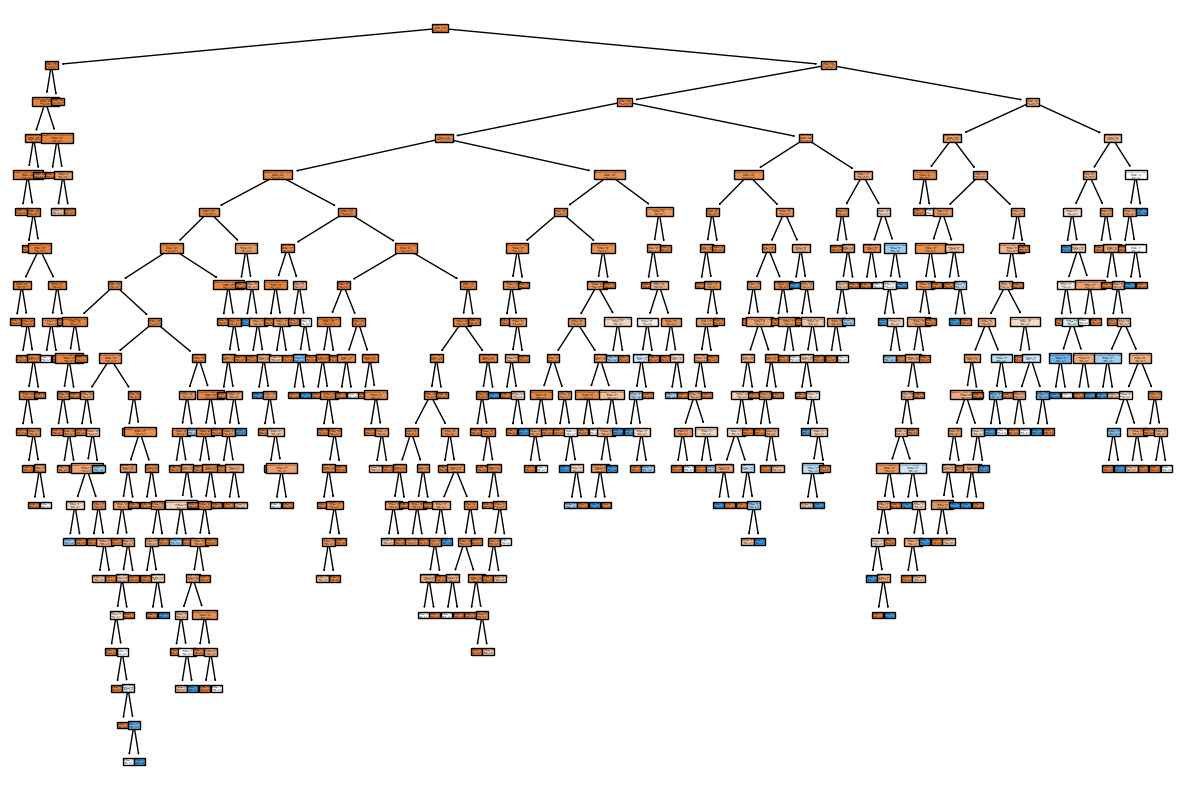

In [ ]:
# prompt: draw decision tree

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


In [ ]:
# prompt: What is the value of entropy at the left child of root?

# Get the entropy of the left child of the root node
left_child_entropy = clf.tree_.impurity[2]

print("Entropy of the left child of the root node:", left_child_entropy)


Entropy of the left child of the root node: 0.03813932218627321


In [ ]:
# prompt: Out of DecisionTreeClassifier, KNeighborsClassifier and LogisticRegression,
# which one performs the best when used as base estimator in BaggingClassifier on the test data in terms of accuracy score when 20 base estimators are used ?
# (Use random state 1729 for BaggingClassifier, DecisionTreeClassifier and LogisticRegression)
# The metric for best performance will be the lowest 'absolute' difference i

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize classifiers
dt_clf = DecisionTreeClassifier(random_state=1729)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(random_state=1729)

# Create BaggingClassifier instances
bagging_dt = BaggingClassifier(base_estimator=dt_clf, n_estimators=20, random_state=1729)
bagging_knn = BaggingClassifier(base_estimator=knn_clf, n_estimators=20, random_state=1729)
bagging_lr = BaggingClassifier(base_estimator=lr_clf, n_estimators=20, random_state=1729)

# Fit the models
bagging_dt.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)
bagging_lr.fit(X_train, y_train)

# Predict on test data
y_pred_dt = bagging_dt.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)
y_pred_lr = bagging_lr.predict(X_test)

# Calculate accuracy scores
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Calculate absolute differences from the mean accuracy
mean_accuracy = (accuracy_dt + accuracy_knn + accuracy_lr) / 3
diff_dt = abs(accuracy_dt - mean_accuracy)
diff_knn = abs(accuracy_knn - mean_accuracy)
diff_lr = abs(accuracy_lr - mean_accuracy)

# Find the model with the lowest absolute difference
best_model = min([("DecisionTreeClassifier", diff_dt),
                 ("KNeighborsClassifier", diff_knn),
                 ("LogisticRegression", diff_lr)], key=lambda x: x[1])[0]

print(f"Best performing base estimator: {best_model}")


In [ ]:
# prompt: The metric for best performance will be the lowest 'absolute' difference in the train and test score.

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize classifiers
dt_clf = DecisionTreeClassifier(random_state=1729)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(random_state=1729)

# Create BaggingClassifier instances
bagging_dt = BaggingClassifier(estimator=dt_clf, n_estimators=20, random_state=1729)
bagging_knn = BaggingClassifier(estimator=knn_clf, n_estimators=20, random_state=1729)
bagging_lr = BaggingClassifier(estimator=lr_clf, n_estimators=20, random_state=1729)

# Fit the models
bagging_dt.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)
bagging_lr.fit(X_train, y_train)

# Predict on train and test data
y_pred_dt_train = bagging_dt.predict(X_train)
y_pred_knn_train = bagging_knn.predict(X_train)
y_pred_lr_train = bagging_lr.predict(X_train)

y_pred_dt_test = bagging_dt.predict(X_test)
y_pred_knn_test = bagging_knn.predict(X_test)
y_pred_lr_test = bagging_lr.predict(X_test)

# Calculate accuracy scores for train and test
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)

accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)

# Calculate absolute differences between train and test accuracy
diff_dt = abs(accuracy_dt_train - accuracy_dt_test)
diff_knn = abs(accuracy_knn_train - accuracy_knn_test)
diff_lr = abs(accuracy_lr_train - accuracy_lr_test)

# Find the model with the lowest absolute difference
best_model = min([("DecisionTreeClassifier", diff_dt),
                 ("KNeighborsClassifier", diff_knn),
                 ("LogisticRegression", diff_lr)], key=lambda x: x[1])[0]

print(f"Best performing base estimator based on lowest train-test difference: {best_model}")


Best performing base estimator based on lowest train-test difference: LogisticRegression


In [ ]:
# prompt: print accuracy score on test and train sets

print("Accuracy on training set:")
print("DecisionTreeClassifier:", accuracy_dt_train)
print("KNeighborsClassifier:", accuracy_knn_train)
print("LogisticRegression:", accuracy_lr_train)

print("\nAccuracy on test set:")
print("DecisionTreeClassifier:", accuracy_dt_test)
print("KNeighborsClassifier:", accuracy_knn_test)
print("LogisticRegression:", accuracy_lr_test)


Accuracy on training set:
DecisionTreeClassifier: 0.9939285714285714
KNeighborsClassifier: 0.9521428571428572
LogisticRegression: 0.9514285714285714

Accuracy on test set:
DecisionTreeClassifier: 0.9441666666666667
KNeighborsClassifier: 0.9508333333333333
LogisticRegression: 0.9516666666666667


In [ ]:
# prompt: When the above three individual classifiers (with same settings) are used in VotingClassifier, how much absolute difference do we obtain in train and test scores? Enter your answer correct upto 4 decimal places.

from sklearn.ensemble import VotingClassifier

# Initialize classifiers
dt_clf = DecisionTreeClassifier(random_state=1729)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(random_state=1729)

# Create VotingClassifier instance
voting_clf = VotingClassifier(estimators=[
    ('dt', dt_clf), ('knn', knn_clf), ('lr', lr_clf)], voting='hard')

# Fit the model
voting_clf.fit(X_train, y_train)

# Predict on train and test data
y_pred_train = voting_clf.predict(X_train)
y_pred_test = voting_clf.predict(X_test)

# Calculate accuracy scores for train and test
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate absolute difference between train and test accuracy
diff = abs(accuracy_train - accuracy_test)

print(f"Absolute difference between train and test accuracy: {diff:.4f}")


Absolute difference between train and test accuracy: 0.0043


In [ ]:
# prompt: print accuracy score on test and train sets

print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)


Accuracy on training set: 0.9542857142857143
Accuracy on test set: 0.95
